### IMPORT LIBRARAY 💓📚

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


### READ DATA

In [29]:
df=pd.read_csv("C:/Users/LAP ME/Downloads/data.csv")

### CHEACK DATA 

In [30]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [32]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [33]:
df.duplicated().any()

False

In [34]:
df.shape

(569, 33)

In [35]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
215,8810987,M,13.860,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,...,26.93,104.40,750.1,0.1460,0.43700,0.4636,0.16540,0.3630,0.10590,NaN
147,86973701,B,14.950,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.03562,...,25.47,107.10,809.7,0.0997,0.25210,0.2500,0.08405,0.2852,0.09218,NaN
396,90401601,B,13.510,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.05381,...,27.20,97.33,675.2,0.1428,0.25700,0.3438,0.14530,0.2666,0.07686,NaN
175,872113,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.00000,0.00000,...,17.04,58.36,259.2,0.1162,0.07057,0.0000,0.00000,0.2592,0.07848,NaN
472,911384,B,14.920,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,...,18.22,112.00,906.6,0.1065,0.27910,0.3151,0.11470,0.2688,0.08273,NaN


In [36]:
df.drop(['id','diagnosis','Unnamed: 32'],axis=1,inplace=True)

In [37]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [39]:
columns=df.columns.tolist()
columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

### DATA PREPROCESSING 

In [40]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

In [41]:
scaled_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### PCA MODEL 

In [42]:
pca_model=PCA()
pca_model.fit(scaled_df)

PCA()

Text(0, 0.5, 'Variance')

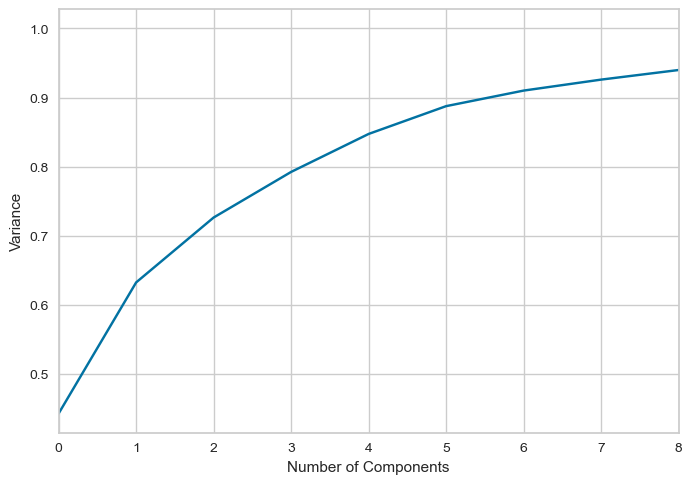

In [43]:
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlim(0,8,1)
plt.xlabel("Number of Components")
plt.ylabel("Variance")

In [44]:
pca_model=PCA(n_components = 8)
pca_data=pca_model.fit_transform(scaled_df)
pca_data

array([[ 9.19283683,  1.94858307, -1.12316618, ...,  1.41142561,
         2.15935729, -0.39838848],
       [ 2.3878018 , -3.76817174, -0.52929268, ...,  0.02865631,
         0.01335882,  0.24098696],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.54145235,
        -0.66816675,  0.09736369],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ..., -0.53444702,
        -0.19276013,  0.34189133],
       [10.37479406,  1.67201011, -1.87702934, ...,  0.56793681,
         0.22307847, -0.28023607],
       [-5.4752433 , -0.67063679,  1.49044307, ...,  1.61783828,
         1.69894358,  1.04635494]])

In [45]:
pca_data.shape

(569, 8)

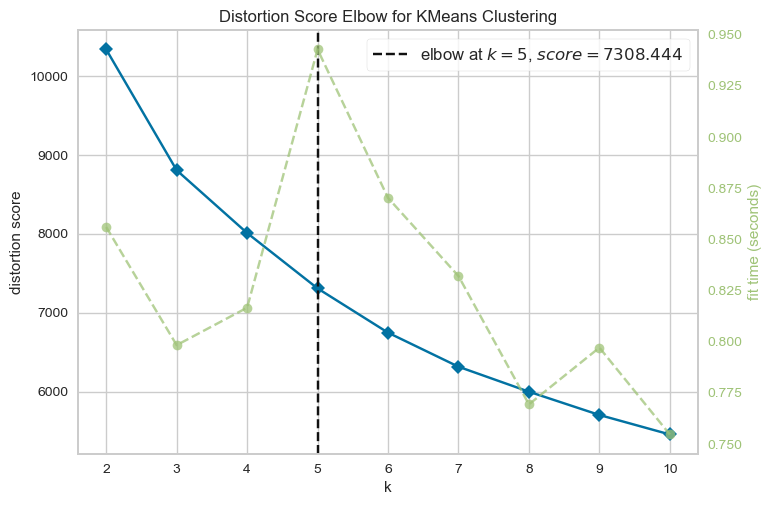

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
elbow_method=KElbowVisualizer(KMeans(),k=10)
elbow_method.fit(pca_data)
elbow_method.show()

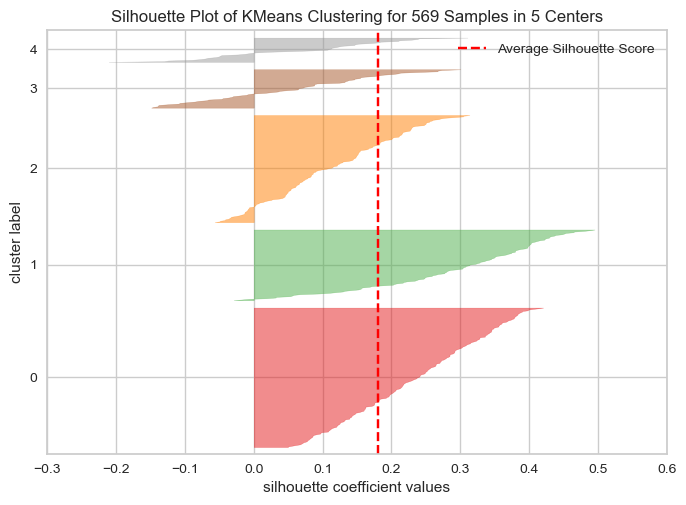

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
model =KMeans(5)
Visualizer =silhouette_visualizer(model,pca_data,color='yellowbrick')
Visualizer.fit(pca_data)
Visualizer.show()

### ELBOW_METHOD

In [50]:
scores=[]
k_range =range (1,10)
for k in k_range:
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(pca_data)
    scores.append(kmeans_model.inertia_)

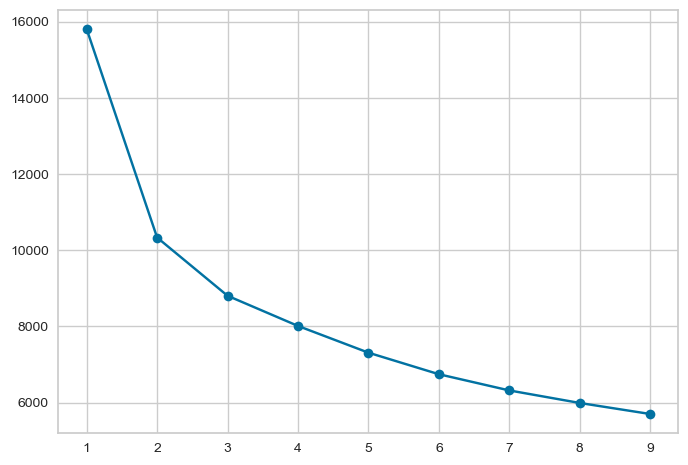

In [51]:
plt.plot(k_range,scores,marker='o')

### silhoutte method


In [53]:
scores=[]
silhoutte=[]
k_range =range (2,10)
for k in k_range:
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(pca_data)
    y_pred=kmeans_model.predict(pca_data)
    scores.append(kmeans_model.inertia_)
    silhoutte.append(silhouette_score(pca_data,y_pred))
print("k = ", k)
print("silhoutte score :%0.4f" % silhouette_score(pca_data, y_pred))

k =  9
silhoutte score :0.1744


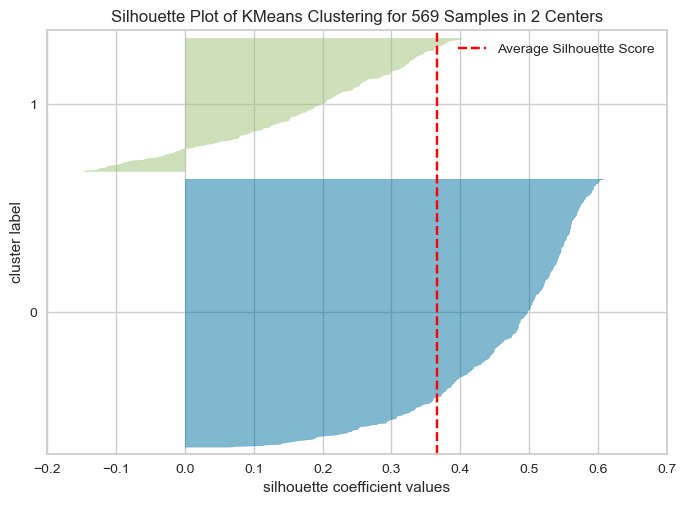

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
model = KMeans(2)
visualizer = silhouette_visualizer(model, pca_data, colors = 'yellowbrick')
visualizer.fit(pca_data)
visualizer.show()